# Data analysis Project 3

Prepared by:
 
Name: Mohamed Elyass Mohamed Ahmed

Passport: P06382503

## Will do:

1- Full data cleaning.

2- Full data filtering (analysis) and make sure I can answer any given questions.

3- simple data visualiztion (more likely to do analysis and visuals in Power BI, I will have some projects there too).

In [1]:
import numpy as np
import pandas as pd  
import statsmodels.api as sm
import matplotlib.pyplot as plt   
import seaborn as sns  

In [2]:
df0 = pd.read_csv(r'C:\Users\HP\Downloads\archive (6).zip')

In [3]:
df0.head(5)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
df0.isna().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [5]:
df0.shape

(1070, 15)

In [6]:
df0.dropna(inplace=True)

In [7]:
df0.duplicated().sum()

0

In [8]:
df0.reset_index(inplace=True)

In [9]:
df0.drop('index', axis=1, inplace=True)

In [10]:
df = df0

In [11]:
df.isna().sum()

level_0                0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64

In [12]:
df.head(5)

,level_0,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


## Research Questions:

In [13]:
""" 
1. Book Performance Analysis:

   - Which book has the highest and lowest average rating? 
   - How does the number of ratings correlate with the average rating?  

2. Sales and Revenue Insights:

   - Which book has generated the highest and lowest gross sales? 
   - Which publisher has the highest total revenue?  
   - How does the sale price impact units sold?  

3. Genre and Author Impact:

   - Do books written by "Novice" vs. "Intermediate" authors perform differently in ratings and sales? 
   - Is there a noticeable difference in ratings between "fiction" and "genre fiction"?  

4. Market Trends:

   - Are newer books (published after 2000) performing better in terms of ratings and sales compared to older books?  
   - Is there a trend in book sales based on publishing year?  

5. Statistical Correlations: 

   - Is there a strong correlation between publisher revenue and units sold?  
   - What is the relationship between book rating and sales rank?  
  """

' \n1. Book Performance Analysis:\n\n   - Which book has the highest and lowest average rating? \n   - How does the number of ratings correlate with the average rating?  \n\n2. Sales and Revenue Insights:\n\n   - Which book has generated the highest and lowest gross sales? \n   - Which publisher has the highest total revenue?  \n   - How does the sale price impact units sold?  \n\n3. Genre and Author Impact:\n\n   - Do books written by "Novice" vs. "Intermediate" authors perform differently in ratings and sales? \n   - Is there a noticeable difference in ratings between "fiction" and "genre fiction"?  \n\n4. Market Trends:\n\n   - Are newer books (published after 2000) performing better in terms of ratings and sales compared to older books?  \n   - Is there a trend in book sales based on publishing year?  \n\n5. Statistical Correlations: \n\n   - Is there a strong correlation between publisher revenue and units sold?  \n   - What is the relationship between book rating and sales rank? 

##    - Which book has the highest and lowest average rating? 


In [14]:
df.groupby('Book Name')['Book_average_rating'].max().sort_values(ascending=0).head(10)

Book Name
Words of Radiance                                                4.77
A Court of Mist and Fury                                         4.72
The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury    4.65
The Way of Kings                                                 4.64
Calvin and Hobbes                                                4.61
Queen of Shadows                                                 4.60
The Hobbit and The Lord of the Rings                             4.59
A Storm of Swords: Part 2 Blood and Gold                         4.56
The House of Hades                                               4.54
Heir of Fire                                                     4.53
Name: Book_average_rating, dtype: float64

<Axes: ylabel='Book_average_rating'>

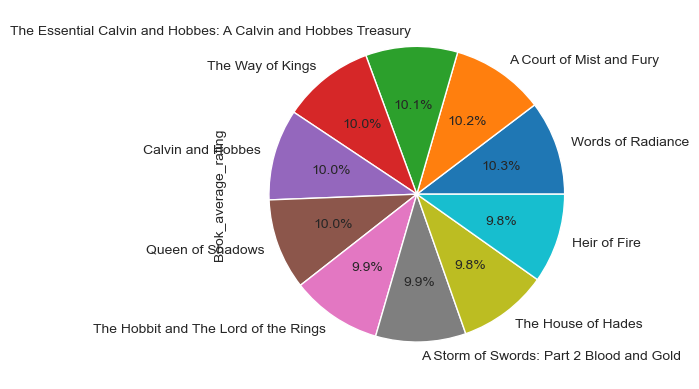

In [76]:
df.groupby('Book Name')['Book_average_rating'].max().sort_values(ascending=0).head(10).plot(kind= 'pie', autopct= '%.1f%%')

This is a list of the top 10 highest-rated books based on average reader ratings.

'Words of Radiance' is at the top with a 4.77 rating, followed by 'A Court of Mist and Fury' at 4.72.

Most of these books are having ratings range from 4.77 to 4.53, meaning readers really love them.

In [16]:
df.groupby('Book Name')['Book_average_rating'].min().sort_values(ascending=1).head(10)

Book Name
The 3 Mistakes of My Life          2.97
The Mermaid Chair                  3.10
Death Comes to Pemberley           3.21
The Red Badge of Courage           3.21
Het diner                          3.22
Her Fearful Symmetry               3.23
Pride and Prejudice and Zombies    3.28
The Silent Wife                    3.30
Go Set a Watchman                  3.31
Chasing Harry Winston              3.32
Name: Book_average_rating, dtype: float64

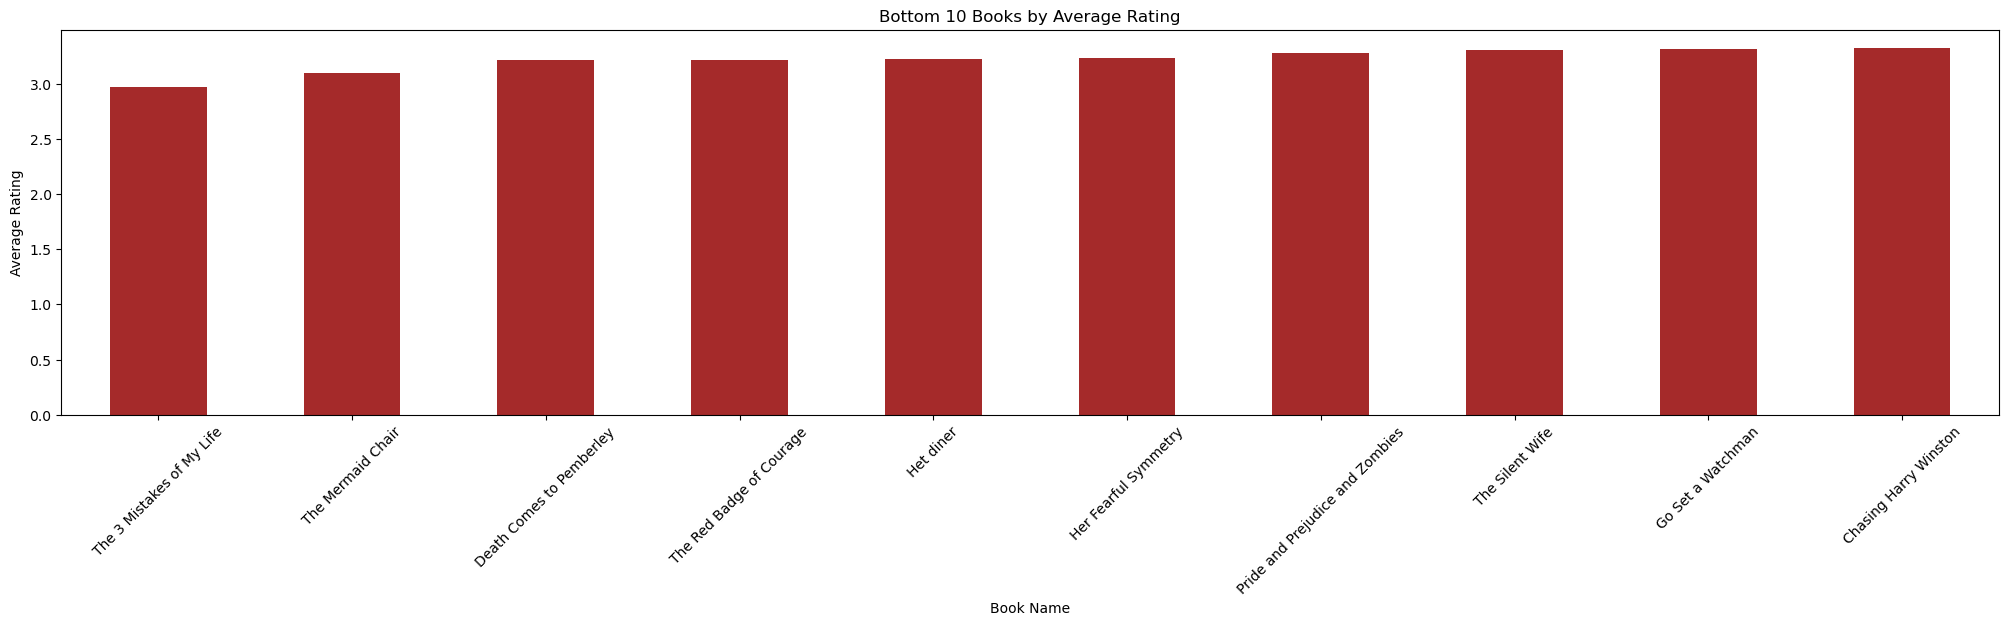

In [17]:
df.groupby('Book Name')['Book_average_rating'].min().sort_values(ascending=True).head(10).plot(kind='bar', color='brown', figsize=(25,5))

plt.title('Bottom 10 Books by Average Rating')   
plt.xlabel('Book Name')   
plt.ylabel('Average Rating')   
plt.xticks(rotation=45)   

plt.show()


##    - How does the number of ratings correlate with the average rating?  


In [18]:
df['Book_ratings_count'].corr(df['Book_average_rating'])

0.0996586881059961

In [19]:
 
X = df['Book_ratings_count']  
y = df['Book_average_rating']   

# Add a constant term to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Book_average_rating   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                  0.009
Method:                  Least Squares   F-statistic:                     9.991
Date:                 Wed, 26 Feb 2025   Prob (F-statistic):            0.00162
Time:                         17:50:24   Log-Likelihood:                -16.503
No. Observations:                  998   AIC:                             37.01
Df Residuals:                      996   BIC:                             46.82
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9

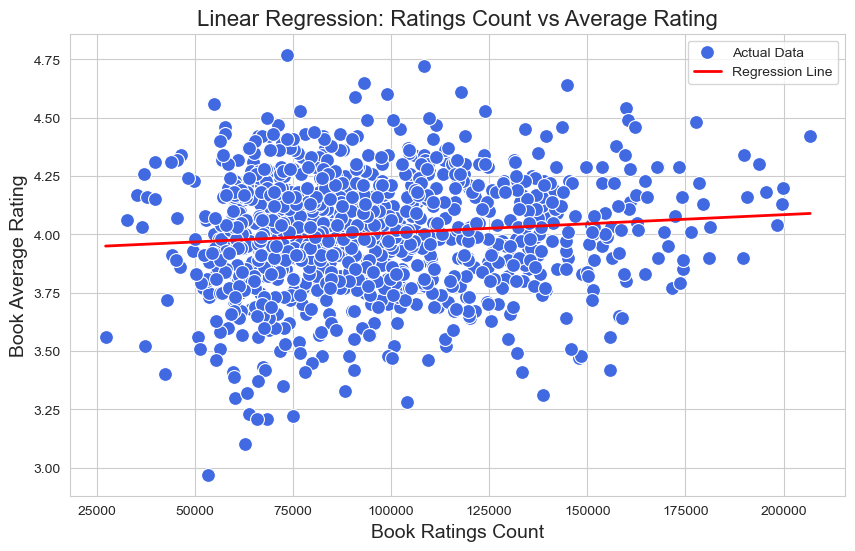

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Perform linear regression
X = sm.add_constant(df['Book_ratings_count'])
y = df['Book_average_rating']
model = sm.OLS(y, X).fit()
df['predicted'] = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(x=df['Book_ratings_count'], y=df['Book_average_rating'], color='royalblue', label="Actual Data", s=100)
sns.lineplot(x=df['Book_ratings_count'], y=df['predicted'], color='red', label="Regression Line", linewidth=2)

# Labels and title
plt.xlabel("Book Ratings Count", fontsize=14)
plt.ylabel("Book Average Rating", fontsize=14)
plt.title("Linear Regression: Ratings Count vs Average Rating", fontsize=16)
plt.legend()
plt.show()


Answer: Yes, but the effect is extremely small.

R-squared is (less than 30%) → The model has weak explanatory power.

Books with more ratings tend to have slightly higher average ratings, but the increase is almost negligible (0.00000078 per rating).

The relationship is statistically significant, but it does not explain much (R = 1%).

 


##    - Which book has generated the highest and lowest gross sales? 


In [21]:
df.head(4)

,level_0,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,predicted
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,4.050101
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,4.041817
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,4.036678
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,4.046203


In [22]:
df.groupby('Book Name')['gross sales'].max().sort_values(ascending=0).head(10)

Book Name
Go Set a Watchman                          47795.00
When You Are Engulfed in Flames            41250.00
Daughter of Smoke & Bone                   37952.50
Beowulf                                    34160.00
The Power of Habit                         27491.67
The Virgin Suicides                        26904.06
Midnight in the Garden of Good and Evil    26182.00
Hopeless                                   26093.67
A Little Princess                          23792.34
The Velveteen Rabbit                       21797.82
Name: gross sales, dtype: float64

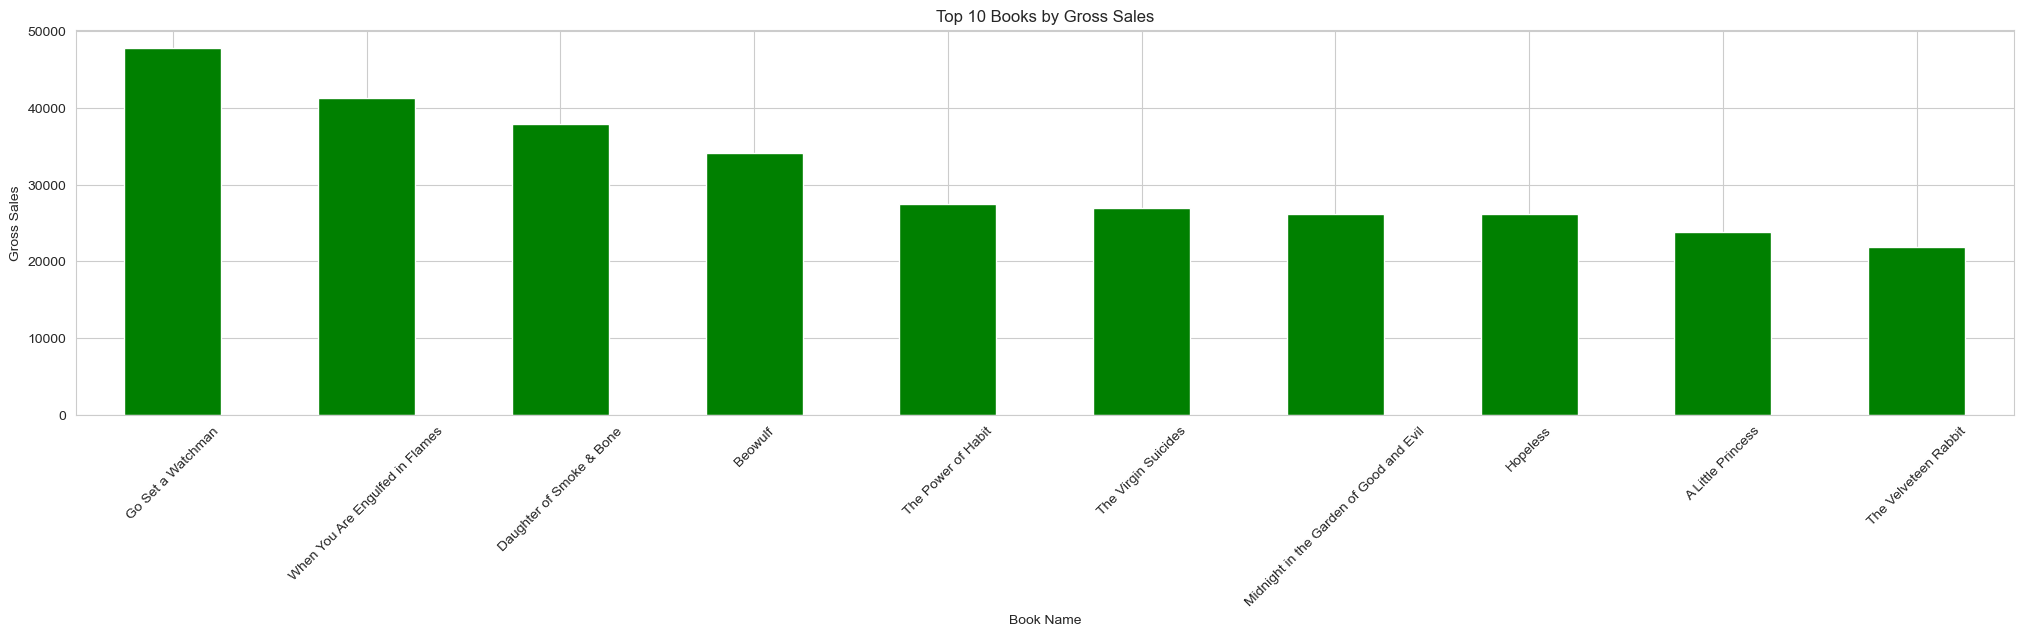

In [23]:
df.groupby('Book Name')['gross sales'].max().sort_values(ascending=False).head(10).plot(kind='bar', color='green', figsize=(25,5))

plt.title('Top 10 Books by Gross Sales')  
plt.xlabel('Book Name')  
plt.ylabel('Gross Sales')
plt.xticks(rotation=45)

plt.show()


In [24]:
df.groupby('Book Name')['gross sales'].max().sort_values(ascending=0).tail(10)

Book Name
Masquerade                  106.92
Blood of the Fold           106.92
A Canticle for Leibowitz    106.92
The Carnivorous Carnival    105.93
A Painted House             105.93
The Killer Angels           105.93
Intensity                   104.94
Night Road                  104.94
Gray Mountain               104.94
Airframe                    104.94
Name: gross sales, dtype: float64

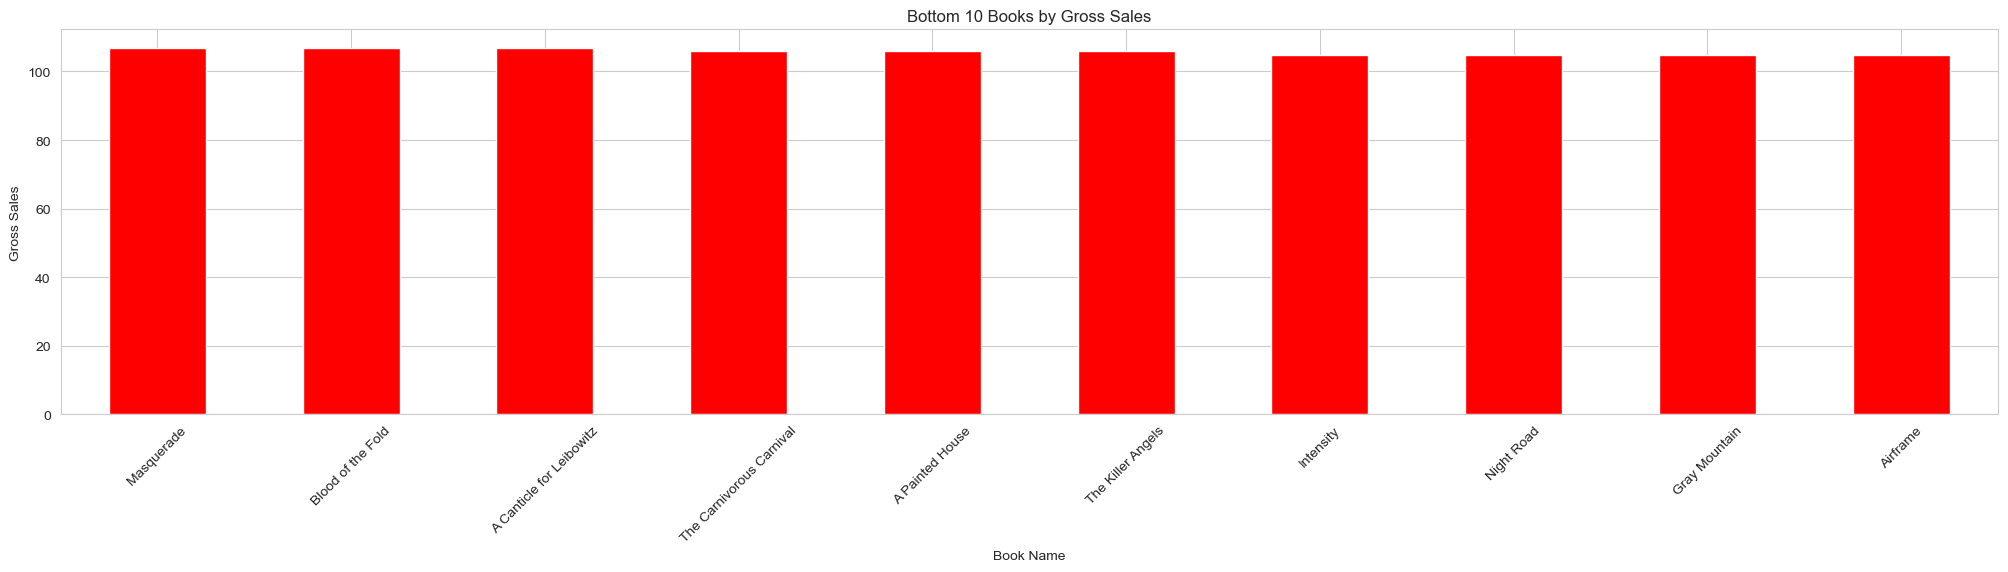

In [74]:
df.groupby('Book Name')['gross sales'].max().sort_values(ascending=False).tail(10).plot(kind='bar', color='red', figsize=(25,5))

plt.title('Bottom 10 Books by Gross Sales')   
plt.xlabel('Book Name')  
plt.ylabel('Gross Sales')   
plt.xticks(rotation=45)  

plt.show()


##    - Which publisher has the highest total revenue?  


In [26]:
df.head(4)

,level_0,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,predicted
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,4.050101
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,4.041817
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,4.036678
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,4.046203


In [27]:
df.columns

Index(['level_0', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold', 'predicted'],
      dtype='object')

In [28]:
df.columns = df.columns.str.strip()

In [29]:
df.groupby('Publisher')['publisher revenue'].sum().sort_values(ascending=0)

Publisher
Penguin Group (USA) LLC                 197201.982
Random House LLC                        171376.728
Amazon Digital Services,  Inc.          141269.400
Hachette Book Group                     128644.398
HarperCollins Publishers                125299.920
Simon and Schuster Digital Sales Inc     46564.482
Macmillan                                31876.770
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

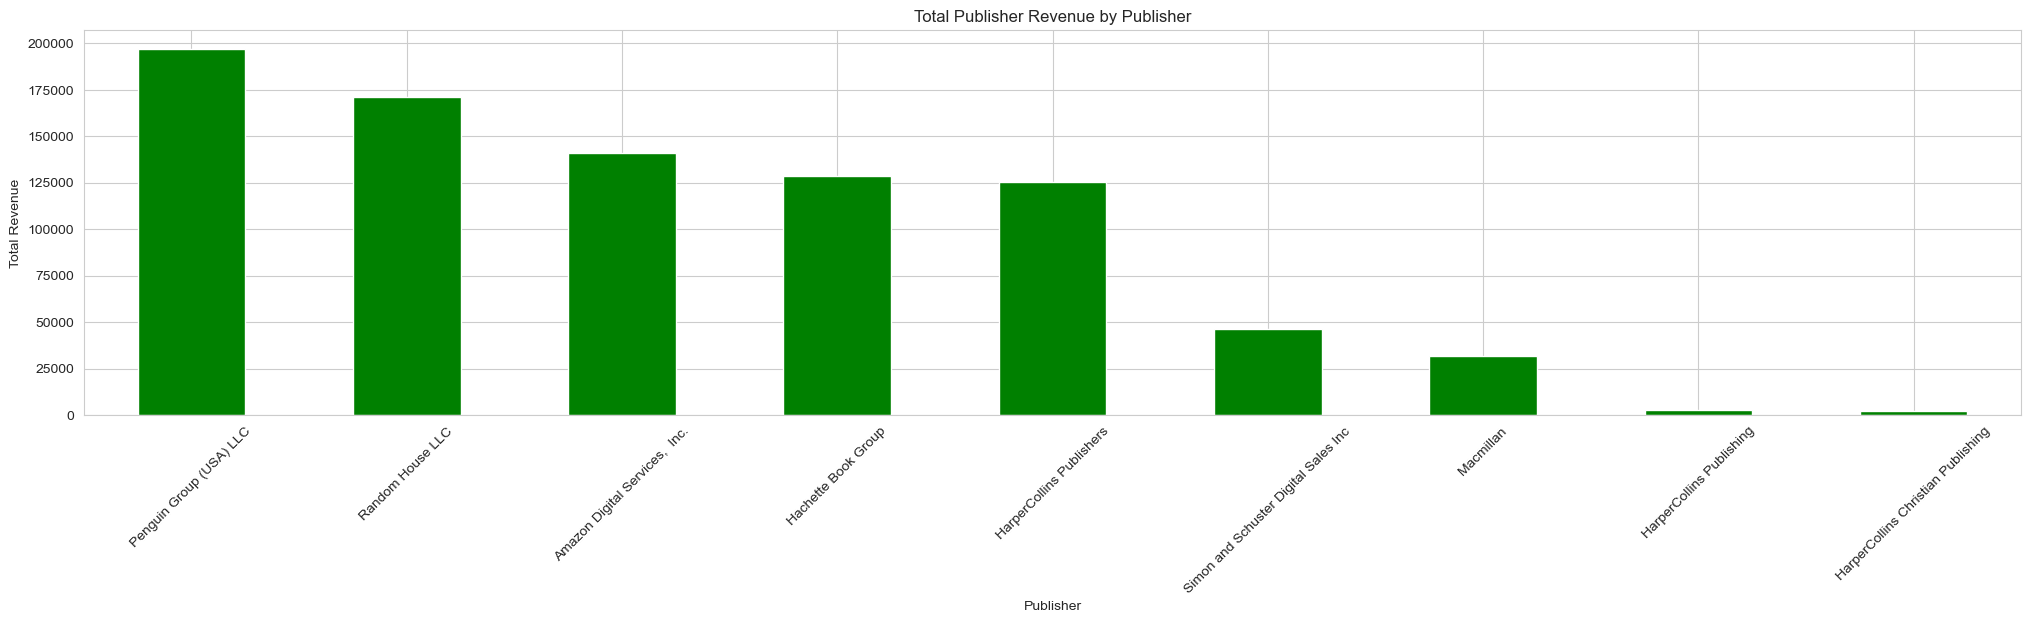

In [30]:
df.groupby('Publisher')['publisher revenue'].sum().sort_values(ascending=False).plot(kind='bar', color='green', figsize=(25,5))

plt.title('Total Publisher Revenue by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  
 

plt.show()


##  - How does the sale price impact units sold?  

In [31]:
df.head(4)

,level_0,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,predicted
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,4.050101
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,4.041817
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,4.036678
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,4.046203


In [32]:
df['sale price'].corr(df['units sold'])


-0.0009426307416615011

                            OLS Regression Results                            
Dep. Variable:             units sold   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 0.0008850
Date:                Wed, 26 Feb 2025   Prob (F-statistic):              0.976
Time:                        21:51:48   Log-Likelihood:                -11045.
No. Observations:                 998   AIC:                         2.209e+04
Df Residuals:                     996   BIC:                         2.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9822.0404    825.123     11.904      0.0

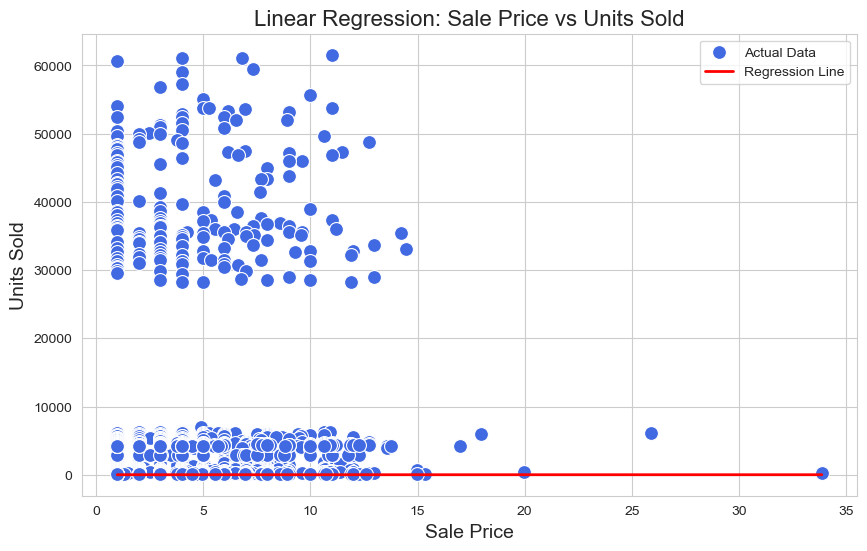

In [67]:
X = df['sale price']
y = df['units sold']

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary()) 

# Plot
plt.figure(figsize=(10, 6)) 
sns.set_style("whitegrid")
sns.scatterplot(x=df['sale price'], y=df['units sold'], color='royalblue', label="Actual Data", s=100)
sns.lineplot(x=df['sale price'], y=df['predicted'], color='red', label="Regression Line", linewidth=2)

# Labels and title
 
plt.xlabel("Sale Price", fontsize=14)
plt.ylabel("Units Sold", fontsize=14)
plt.title("Linear Regression: Sale Price vs Units Sold", fontsize=16)
plt.legend()
plt.show()



R-squared = 0 → The model explains nothing.

P-value = 0.976 → No significant effect.

Price coefficient = -4.08 but meaningless → Even if price affects sales a little, it’s just random noise.

So, the final answer is:

Sale price has no significant impact on the number of units sold in this dataset.

## - Do books written by "Novice" vs. "Intermediate" authors perform differently in ratings and sales? 

In [34]:
df

,level_0,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,predicted
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000,4.050101
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250,4.041817
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500,4.036678
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500,4.046203
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750,4.083109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106,3.957788
994,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106,3.973313
995,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106,3.974426
996,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106,3.973870


In [35]:
df1 = df.copy()

In [36]:
df2 = df1[df1['Author_Rating'].isin(['Novice', 'Intermediate'])]

In [37]:
df2.groupby('Author_Rating')['Book_average_rating'].mean()

Author_Rating
Intermediate    3.907334
Novice          3.371724
Name: Book_average_rating, dtype: float64

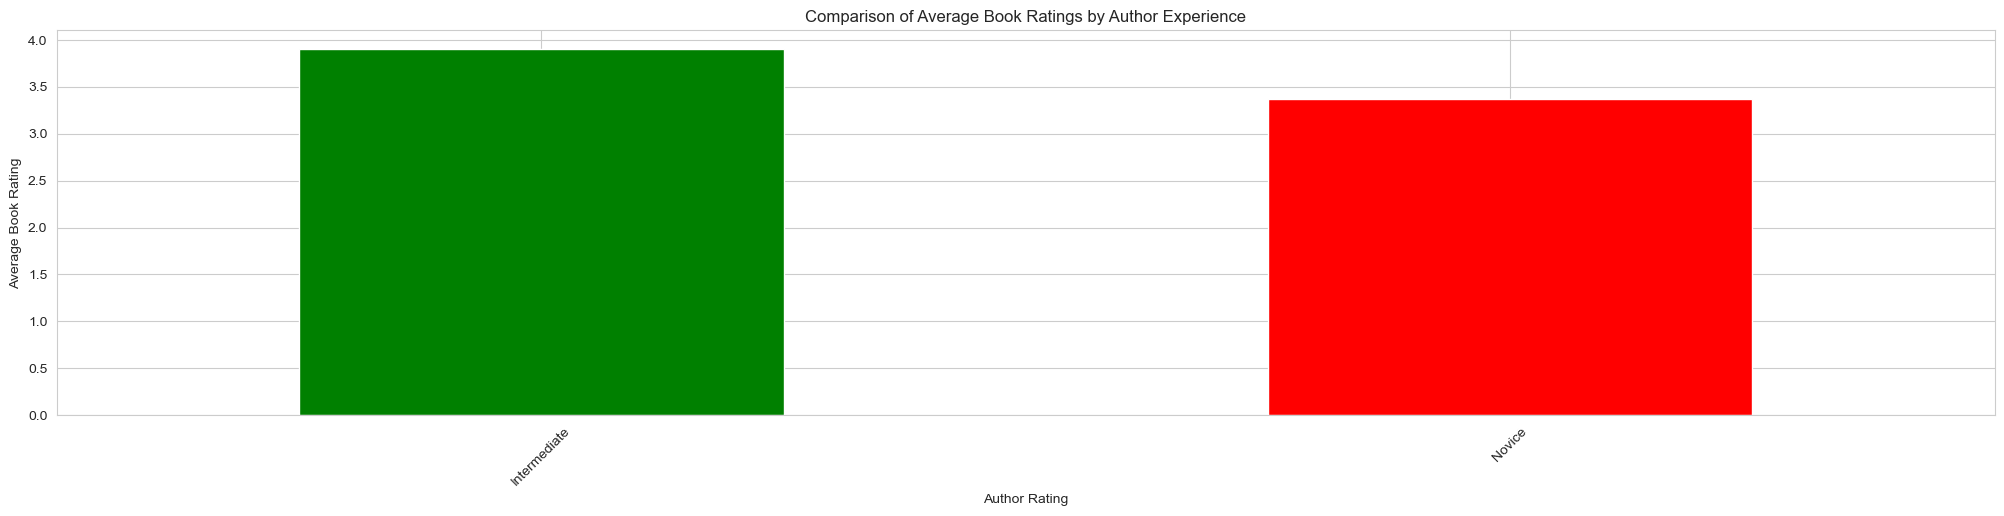

In [81]:
df2.groupby('Author_Rating')['Book_average_rating'].mean().plot(
    kind='bar', 
    color=['green', 'red'], 
    figsize=(25,5)
)

plt.xlabel('Author Rating')
plt.ylabel('Average Book Rating')
plt.title('Comparison of Average Book Ratings by Author Experience')
plt.xticks(rotation=45)  

plt.show()


Average Rating (Book_average_rating)

Novice authors: Have ratings around 3.371724

Intermediate authors: Have higher ratings, around 3.907334

Intermediate authors tend to have higher ratings than Novice authors.

In [39]:
df2.groupby('Author_Rating')['units sold'].sum()

Author_Rating
Intermediate    4636146
Novice           212243
Name: units sold, dtype: int64

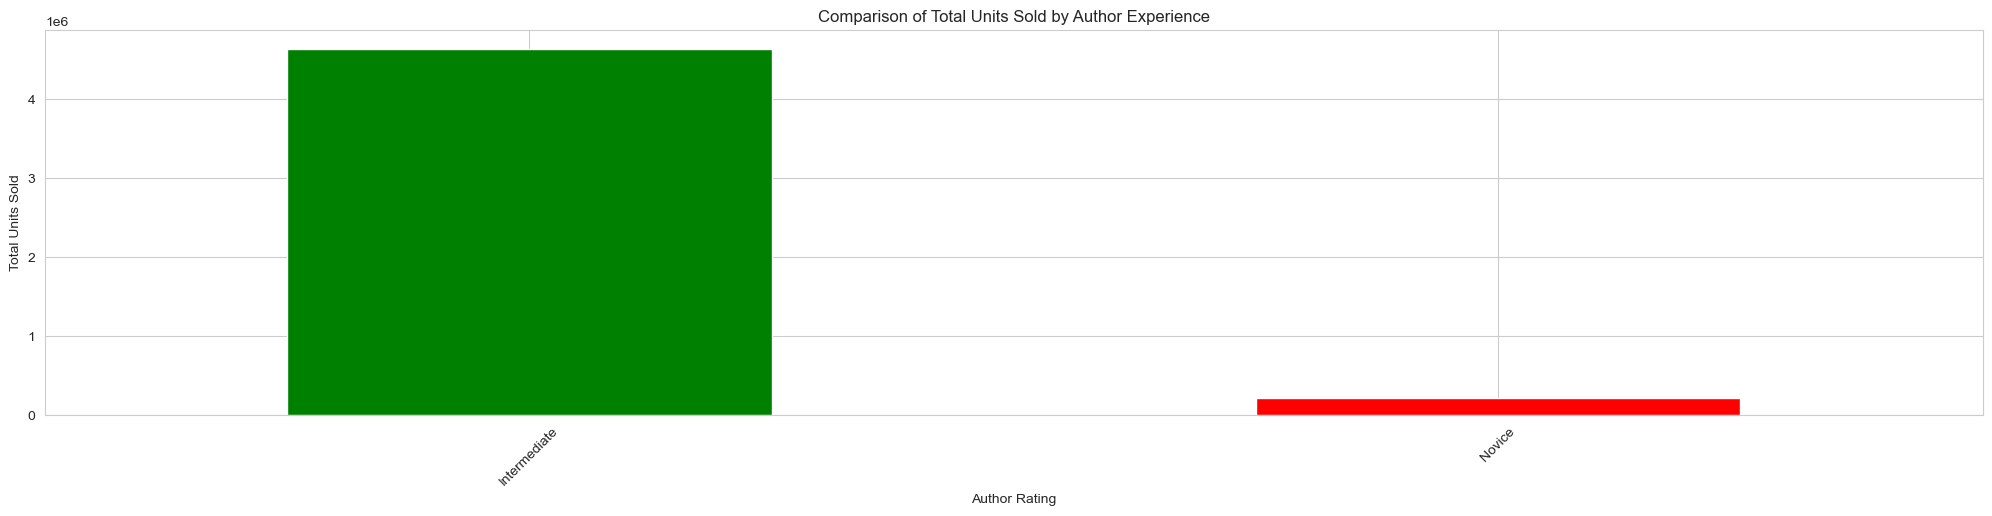

In [40]:
df2.groupby('Author_Rating')['units sold'].sum().plot(
    kind='bar', 
    color=['green', 'red'], 
    figsize=(25,5)
)

plt.xlabel('Author Rating')
plt.ylabel('Total Units Sold')
plt.title('Comparison of Total Units Sold by Author Experience')
plt.xticks(rotation=45) 

plt.show()


Sales (units sold)

The totla of units sold (212243) is from a Novice author.

However, Intermediate authors also have good sales, around 4636146 units.

Novice authors may sell more copies, but Intermediate authors seem to have better ratings.

## - Is there a noticeable difference in ratings between "fiction" and "genre fiction"?  

In [41]:
df.head(4)

,level_0,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,predicted
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,4.050101
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,4.041817
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,4.036678
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,4.046203


In [42]:
df3 = df.copy()

In [43]:
df4 = df3[df3['genre'].isin(['fiction', 'genre fiction'])]

In [44]:
df4.groupby('genre')['Book_average_rating'].mean()

genre
fiction          4.036909
genre fiction    3.996451
Name: Book_average_rating, dtype: float64

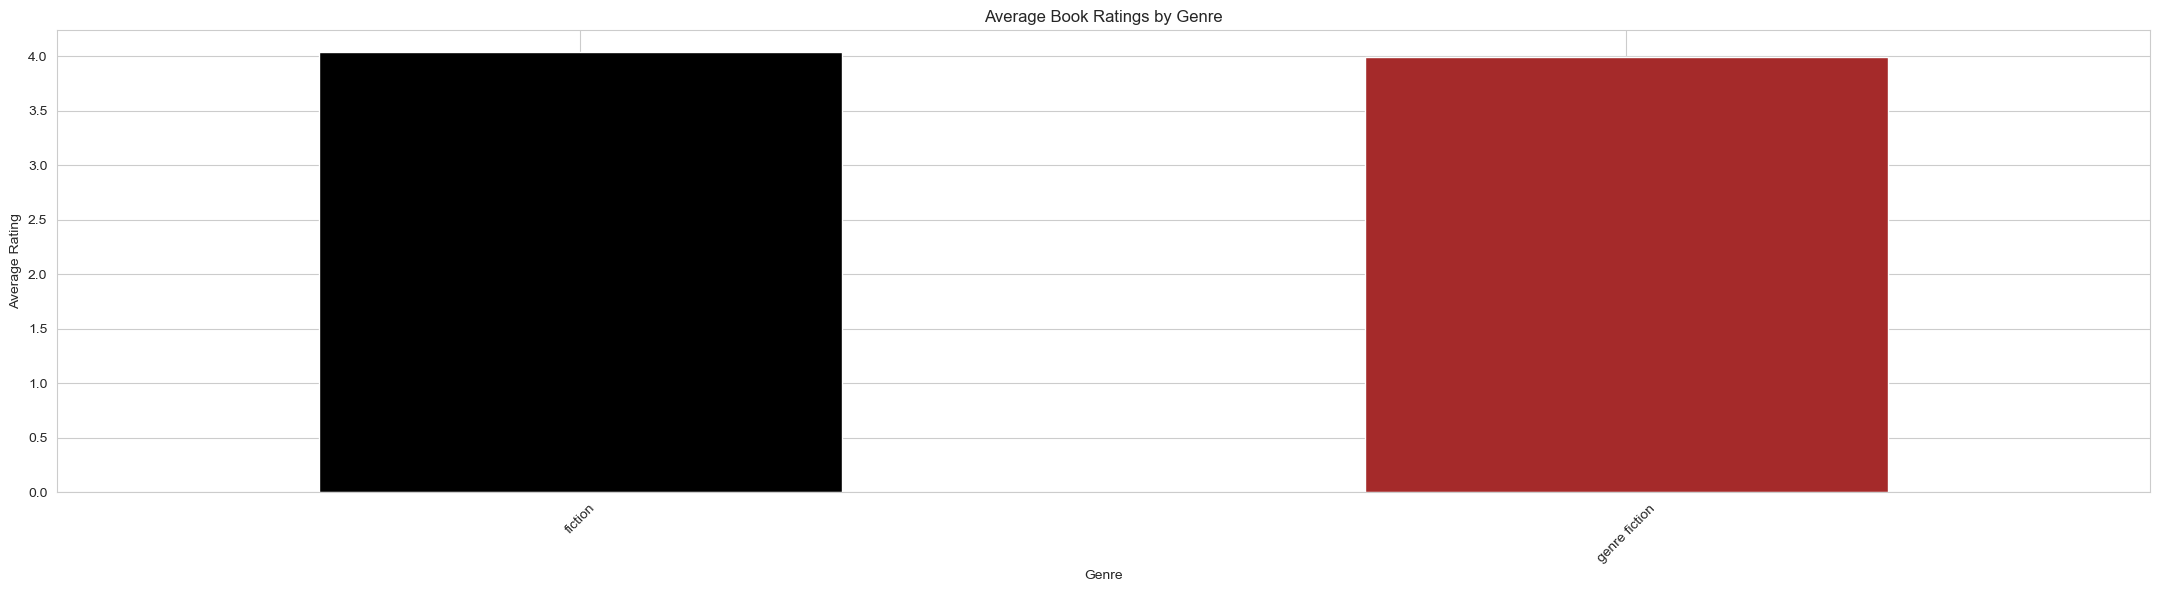

In [45]:
df4.groupby('genre')['Book_average_rating'].mean().plot(kind='bar', color= ('black', 'brown'),figsize= (27, 6))

plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Book Ratings by Genre')
plt.xticks(rotation=45)  # Rotate  

plt.show()


### A mean rating of 4.03 for fiction and 3.99 for genre fiction shows only a small difference of 0.04, which is not significant in most cases.

## - Is there a strong correlation between publisher revenue and units sold? 

In [46]:
df.head(3)

,level_0,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,predicted
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,4.050101
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,4.041817
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,4.036678


                            OLS Regression Results                            
Dep. Variable:      publisher revenue   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     13.67
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           0.000230
Time:                        22:19:12   Log-Likelihood:                -9135.5
No. Observations:                 998   AIC:                         1.827e+04
Df Residuals:                     996   BIC:                         1.828e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1018.3766     85.738     11.878      0.0

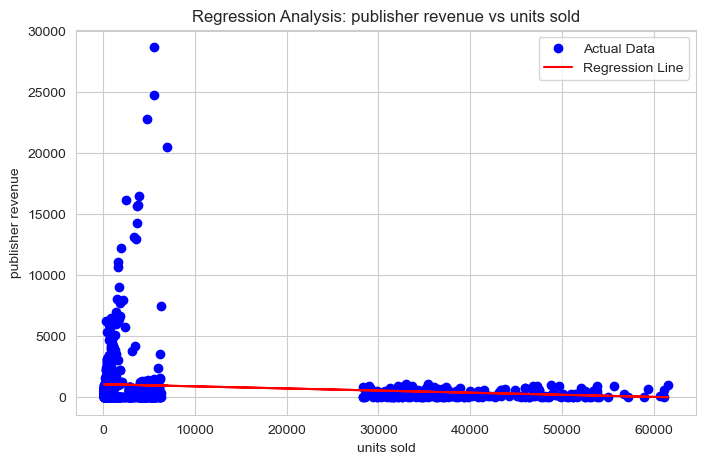

In [70]:
x = df['units sold']  # Independent variable
y = df['publisher revenue']  # Dependent variable
 
x = sm.add_constant(x)  

model = sm.OLS(y, x).fit()
print(model.summary())

plt.figure(figsize=(8, 5))
plt.scatter(x=df['units sold'], y=df['publisher revenue'], label="Actual Data", color='blue')

plt.plot(df['units sold'], model.predict(x), color='red', label="Regression Line")

plt.xlabel('units sold')
plt.ylabel('publisher revenue')
plt.title("Regression Analysis: publisher revenue vs units sold")
plt.legend()
plt.show()

The model is statistically significant (p = 0.003), meaning units sold has a real effect on publisher revenue.

However, R is very low (0.009), meaning units sold explains only 0.9% of revenue changes. Other factors play a much bigger role. R alone does not explain much of the revenue variation



## - What is the relationship between book rating and sales rank?  

In [48]:
df.head(3)

,level_0,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,predicted
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,4.050101
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,4.041817
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,4.036678


                            OLS Regression Results                            
Dep. Variable:             sales rank   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9232
Date:                Wed, 26 Feb 2025   Prob (F-statistic):              0.337
Time:                        22:19:37   Log-Likelihood:                -7314.6
No. Observations:                 998   AIC:                         1.463e+04
Df Residuals:                     996   BIC:                         1.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 787.5559    

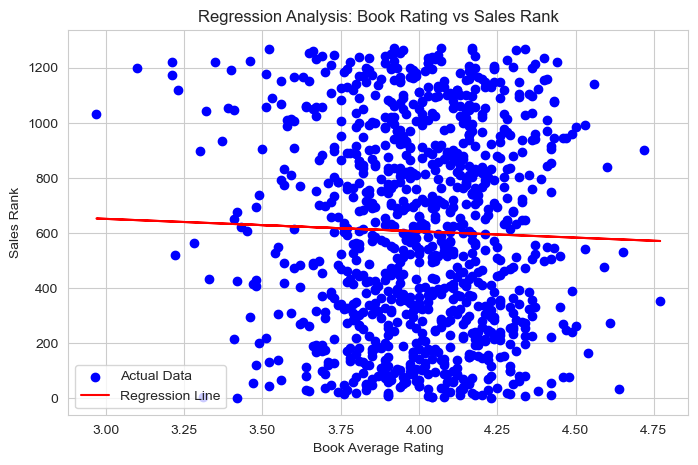

In [71]:
x = df['Book_average_rating']  # Independent variable
y = df['sales rank']  # Dependent variable
 
x = sm.add_constant(x)  

model = sm.OLS(y, x).fit()
print(model.summary())

plt.figure(figsize=(8, 5))
plt.scatter(x=df['Book_average_rating'], y=df['sales rank'], label="Actual Data", color='blue')

plt.plot(df['Book_average_rating'], model.predict(x), color='red', label="Regression Line")

plt.xlabel("Book Average Rating")
plt.ylabel("Sales Rank")
plt.title("Regression Analysis: Book Rating vs Sales Rank")
plt.legend()
plt.show()


The model is very weak: R = 0.001, meaning book ratings explain almost nothing about sales rank.

The relationship is not significant: p-value 0.337 > 0.05.

Regression coefficient (-45.42) suggests a small negative relationship, but it’s not strong or reliable.

##  - Are newer books (published after 2000) performing better in terms of ratings and sales compared to older books?  

In [50]:
df.head()

,level_0,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,predicted
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,4.050101
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,4.041817
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,4.036678
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,4.046203
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750,4.083109


In [51]:
df5 = df.copy()

In [52]:
df6 = df5[df5['Publishing Year'] >= 2000]

In [53]:
df6['Publishing Year'].unique()

array([2015., 2008., 2011., 2012., 2004., 2010., 2006., 2013., 2000.,
       2003., 2005., 2009., 2002., 2007., 2014., 2001., 2016.])

In [54]:
df6.groupby('Publishing Year')['units sold'].sum().sum()

5803439

In [55]:
df6.groupby('Publishing Year')['Book_average_rating'].mean().mean()

4.001139770627351

## Under 2000

In [56]:
df7 = df5[df5['Publishing Year'] < 2000]

In [57]:
df7.groupby('Publishing Year')['units sold'].sum().sum()

3979269

In [58]:
df7.groupby('Publishing Year')['Book_average_rating'].mean().mean()

3.9734499260355025

##  - Is there a trend in book sales based on publishing year?  


In [59]:
df.head(4)

,level_0,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,predicted
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,4.050101
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,4.041817
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,4.036678
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,4.046203


                            OLS Regression Results                            
Dep. Variable:             units sold   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2677
Date:                Wed, 26 Feb 2025   Prob (F-statistic):              0.605
Time:                        22:20:09   Log-Likelihood:                -11045.
No. Observations:                 998   AIC:                         2.209e+04
Df Residuals:                     996   BIC:                         2.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.244e+04   5118.476     

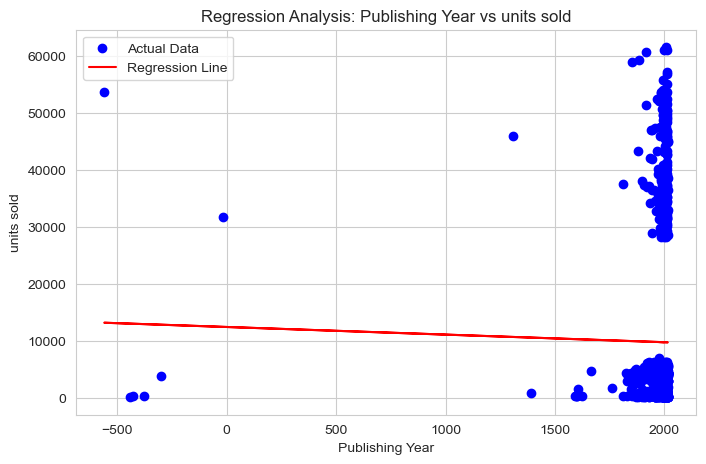

In [72]:
x = df['Publishing Year']  # Independent variable
y = df['units sold']  # Dependent variable
 
x = sm.add_constant(x)  

model = sm.OLS(y, x).fit()

print(model.summary())

plt.figure(figsize=(8, 5))
plt.scatter(x=df['Publishing Year'], y=df['units sold'], label="Actual Data", color='blue')

plt.plot(df['Publishing Year'], model.predict(x), color='red', label="Regression Line")

plt.xlabel('Publishing Year')
plt.ylabel('units sold')
plt.title("Regression Analysis: Publishing Year vs units sold")
plt.legend()
plt.show()

Publishing Year has no impact on units sold. The model is useless because:

R² = 0.000 → Publishing Year explains 0% of the variation in sales.

Adjusted R² is negative → The model is worse than random guessing.

p-value = 0.605 → Not statistically significant (no real effect).

Coefficient = -1.3374 → Even if there was an effect, it’s too small to matter.

Conclusion: Publishing Year does not influence book sales. I guess we to consider other factors (e.g., price, ratings, author popularity) for better predictions.  

## Done.